# Spotify Artist Feature Collaboration Network Analysis
## Part 2

---

## Introduction

In this notebook, I will perform an analysis of the Spotify Artist Feature Collaboration Network. The dataset consists of artist data for approximately 20,000 artists whose songs made it to the Spotify weekly charts. Additionally, it includes data for approximately 136,000 additional artists who had at least one feature with at least one of the chart artists. This dataset allows us to construct a network with over 135,000 musicians as nodes and more than 300,000 collaboration edges between them.

---

## About the Author

**Name:** Daniele Borghesi

**Affiliation:** University of Pisa & Technical University of Valencia

**Contact:** dborghe@etsinf.upv.es

**GitHub:** https://github.com/danieleborghe

**LinkedIn:** https://www.linkedin.com/in/danieleborghesi/


---

## Preliminary operations

In this section, we perform preliminary operations before conducting our analysis on the Spotify collaboration network dataset. Due to the large size of the original dataset, which may lead to extended computation times, I have opted to work with sample versions of the network at different percentages of the original size.

### Importing Sample Versions of the Network Dataset

To mitigate computation time while still ensuring meaningful analysis results, we have imported two sample versions of the network dataset: one representing 5% of the original dataset and another representing 20%. These sample versions allow us to conduct our analysis efficiently while retaining the essential characteristics of the network structure and collaboration patterns.

The decision to utilize sample versions of the dataset stems from the computational challenges posed by the sheer size of the original network. By working with smaller samples, we can expedite data processing and analysis without compromising the integrity of our findings. This approach enables us to explore the network's properties, detect communities, and analyze centrality measures in a timely manner, facilitating a more efficient workflow.

In [108]:
# import main library
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx.algorithms.community as nx_comm

In [109]:
# import original dataset
edges_df = pd.read_csv("data/cleaned_edges.csv")
nodes_df = pd.read_csv("data/cleaned_nodes.csv")

In [110]:
# import 20% sampled dataset
sampled_nodes_20_df = pd.read_csv("data/sampled_nodes_20.csv")
sampled_edges_20_df = pd.read_csv("data/sampled_edges_20.csv")

# import 5% sampled dataset
sampled_nodes_05_df = pd.read_csv("data/sampled_nodes_05.csv")
sampled_edges_05_df = pd.read_csv("data/sampled_edges_05.csv")

# Create a dictionary mapping Spotify IDs to names
spotify_id_to_name_05 = dict(zip(sampled_nodes_05_df['spotify_id'], sampled_nodes_05_df['name']))
# Create a dictionary mapping Spotify IDs to names
spotify_id_to_name_20 = dict(zip(sampled_nodes_20_df['spotify_id'], sampled_nodes_20_df['name']))

# Create a dictionary mapping Spotify IDs to popularity
spotify_id_to_popularity_05 = dict(zip(sampled_nodes_05_df['spotify_id'], sampled_nodes_05_df['popularity']))
# Create a dictionary mapping Spotify IDs to popularity
spotify_id_to_popularity_20 = dict(zip(sampled_nodes_20_df['spotify_id'], sampled_nodes_20_df['popularity']))

In [111]:
# Construct the 20% network from edges.csv
G_20 = nx.from_pandas_edgelist(sampled_edges_20_df, 'id_0', 'id_1')

# Create a subgraph containing only the sampled nodes
subgraph_sampled_20 = G_20.subgraph(G_20)

# Extract the giant component
giant_component_sampled_20 = max(nx.connected_components(subgraph_sampled_20), key=len)

# Create a subgraph containing only the giant component
giant_subgraph_sampled_20 = subgraph_sampled_20.subgraph(giant_component_sampled_20)

# Display the number of nodes and edges before and after extraction
print("Number of NODES before extraction:", G_20.number_of_nodes())
print("Number of EDGES before extraction:", G_20.number_of_edges())
print()
print("Number of NODES in the giant component:", giant_subgraph_sampled_20.number_of_nodes())
print("Number of EDGES in the giant component:", giant_subgraph_sampled_20.number_of_edges())

Number of NODES before extraction: 9838
Number of EDGES before extraction: 11778

Number of NODES in the giant component: 7442
Number of EDGES in the giant component: 10034


![graph twenty percent](figures/sampled_edges_20.png)

In [112]:
# Construct the 5% network from edges.csv
G_05 = nx.from_pandas_edgelist(sampled_edges_05_df, 'id_0', 'id_1')

# Create a subgraph containing only the sampled nodes
subgraph_sampled_05 = G_05.subgraph(G_05)

# Extract the giant component
giant_component_sampled_05 = max(nx.connected_components(subgraph_sampled_05), key=len)

# Create a subgraph containing only the giant component
giant_subgraph_sampled_05 = subgraph_sampled_05.subgraph(giant_component_sampled_05)

# Display the number of nodes and edges before and after extraction
print("Number of NODES before extraction:", G_05.number_of_nodes())
print("Number of EDGES before extraction:", G_05.number_of_edges())
print()
print("Number of NODES in the giant component:", giant_subgraph_sampled_05.number_of_nodes())
print("Number of EDGES in the giant component:", giant_subgraph_sampled_05.number_of_edges())

Number of NODES before extraction: 890
Number of EDGES before extraction: 722

Number of NODES in the giant component: 208
Number of EDGES in the giant component: 221


![graph five percent](figures/sampled_edges_05.png)

## Communities analysis

Analyze the community structure of the network using modularity or another measure if it fits better with your data. Interpret the meaning of the communities and identify the most relevant actors.

In [113]:
# Use Girvan-Newman method to obtain communities
communities_generator = nx.community.girvan_newman(subgraph_sampled_05)

# Get the communities
communities = next(communities_generator)

# Print the communities with names
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {[spotify_id_to_name_05[spotify_id] for spotify_id in community]}")

# Create a color map for communities
color_map = {}
for i, community in enumerate(communities):
    for node in community:
        color_map[node] = i

Community 1: ['707', 'PLN.Beatz', 'Kukon', '2K', 'Kkuba102', 'DZIARMA', 'Sergiusz', 'La Miellerie', 'Kizo', 'Jaill', 'Przyłu', 'KęKę', 'Kabe', 'Swizzy']
Community 2: ['BJ Barham', 'Muscadine Bloodline']
Community 3: ['Yellow Claw', 'Eastside Boyz', 'The Game', 'WILYWNKA', 'Not3s', 'Wolter Kroes', 'PnB Rock', 'Paulina', 'Lauwtje', 'Kir', 'Hajar Mks', 'SIRUP', 'Sky', 'Lotus', 'Brasstracks', 'Lil Jon', 'Kosso', 'Young Robbery', 'Thomas Berge', 'Dr. Dre', 'JORELL', 'San Quinn', 'Spens', 'Migos', 'Bok Nero', 'NANAMI', 'Evan Landes', 'NuSoul', 'Sean T', 'Florida Georgia Line', "Dj Ray'n & Dj Cid", 'Jermaine Dupri', 'Golf Clap', 'Toosii', 'April Grey', 'Cané', 'Kleenex', 'Boef', 'The-Dream', 'Masego', 'Oualid', 'Seffelinie', 'Bailey', 'Mike Kenli', 'BWS', 'Jere McAllister for Slang Music Group', 'Wafia', 'Rayven Justice', 'Ahmed Soultan', 'Sefyu', 'Russ', 'Seba', 'Cutty', 'MN', 'Jamal', 'RushTheProducer', 'Fraser T. Smith', 'Hiplin', 'Electrolightz', 'Blu Chip', 'Ali Ssamid', 'Frank Ocean', '

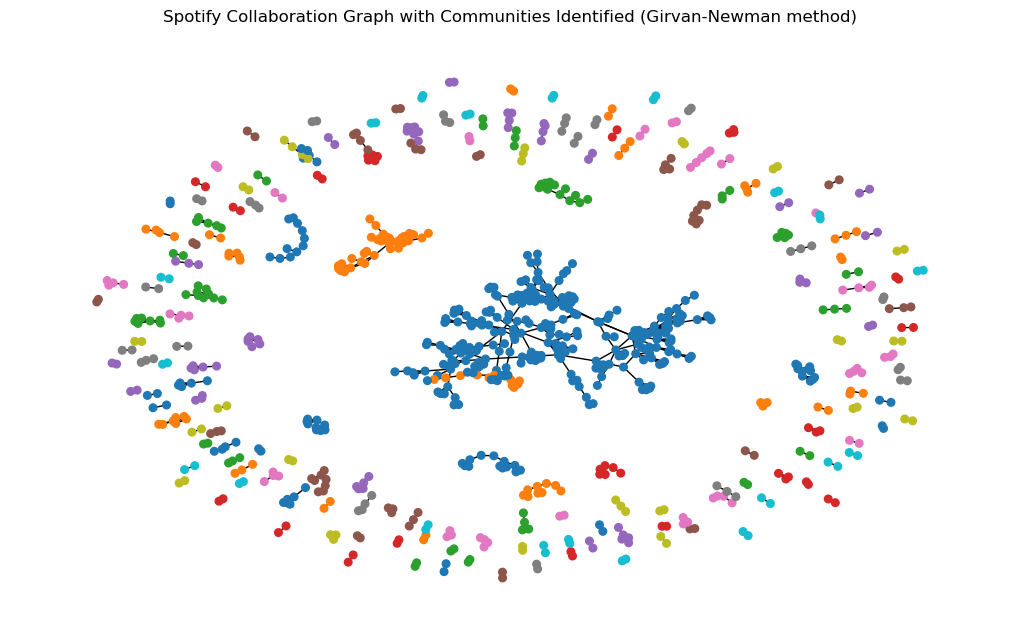

In [114]:
# Plot the graph with nodes colored by community
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph_sampled_05)
nx.draw(subgraph_sampled_05, pos, node_color=[color_map[node] for node in subgraph_sampled_05.nodes()], cmap=plt.cm.tab10, with_labels=False, node_size=30)
plt.title("Spotify Collaboration Graph with Communities Identified (Girvan-Newman method)")
plt.show()

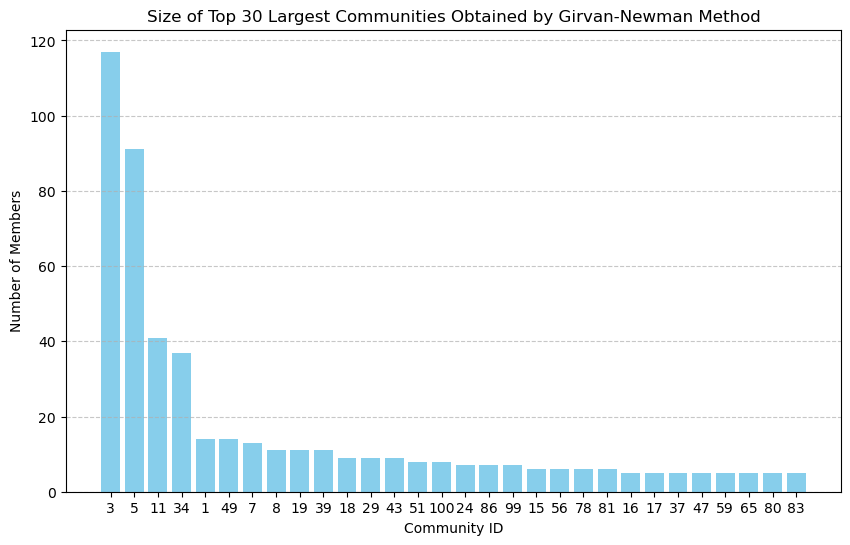

In [115]:
import matplotlib.pyplot as plt

# Calculate the size of each community
community_sizes = [len(community) for community in communities]

# Sort the community sizes in descending order
sorted_indices = sorted(range(len(community_sizes)), key=lambda k: community_sizes[k], reverse=True)
sorted_community_sizes = [community_sizes[i] for i in sorted_indices][:30]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_community_sizes) + 1), sorted_community_sizes, color='skyblue')
plt.xlabel('Community ID')
plt.ylabel('Number of Members')
plt.title('Size of Top 30 Largest Communities Obtained by Girvan-Newman Method')
plt.xticks(range(1, len(sorted_community_sizes) + 1), [i + 1 for i in sorted_indices][:30])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Interpretation of Communities in the Spotify Collaboration Graph (Girvan-Newman method)

1. **Community 3 - Diverse Urban Music Scene:**
   - This community encompasses a broad spectrum of urban music, reflecting collaborations across various subgenres such as hip-hop, rap, R&B, and pop. The presence of iconic figures like "Dr. Dre," "Migos," "Rihanna," and "Beyoncé" suggests a mix of established veterans and contemporary stars.
   - The community likely represents a dynamic network of artists influencing and shaping the urban music landscape. It may include producers, songwriters, vocalists, and instrumentalists collaborating on chart-topping hits, groundbreaking albums, and innovative projects.
   - Collaborations within this community could range from cross-genre experiments to traditional rap features, showcasing the interconnectedness and fluidity of modern music creation.

2. **Community 5 - Electronic and Alternative Fusion:**
   - This community highlights collaborations within the electronic music domain, spanning genres like EDM, house, indie pop, and experimental electronic. Artists such as "Bastille," "A-Trak," and "Spoonface" signify a blend of mainstream acts, underground producers, and vocalists.
   - Collaborations within this community may involve electronic producers teaming up with vocalists to create anthemic dance tracks, experimental projects exploring new sonic territories, and crossover hits blending electronic elements with alternative or pop sensibilities.
   - The community likely represents a hub for creativity and innovation within the electronic music scene, fostering collaborations that push boundaries and redefine genres.

3. **Community 11 - Fusion of Indian and Global Sounds:**
   - This community centers around collaborations within the Indian music industry, encompassing Bollywood, Punjabi, and Indian pop genres. Artists like "Diljit Dosanjh," "Kesha," and "Anuradha Sriram" indicate a fusion of Indian musical traditions with global influences.
   - Collaborations within this community may include Bollywood film soundtracks, Punjabi pop hits, and cross-cultural projects blending Indian instrumentation with Western production styles.
   - The community reflects the cultural richness and diversity of Indian music, serving as a platform for artists to explore hybrid sounds, experiment with cross-genre collaborations, and reach diverse audiences globally.

4. **Community 34 - Vibrant Latin Music Hub:**
   - This community showcases collaborations within the Latin music sphere, with a focus on reggaeton, Latin pop, and urban genres. Artists like "Wisin & Yandel," "Natti Natasha," and "Aventura" represent key figures in the Latin music industry.
   - Collaborations within this community may involve reggaeton duets, Latin pop crossovers, and collaborations between Spanish-speaking artists from different countries.
   - The community reflects the global appeal and influence of Latin music, serving as a nexus for artists to connect, create, and innovate within a dynamic and evolving musical landscape.

5. **Community 49 - German Dance and Pop Fusion:**
   - This community centers around collaborations within the German music scene, particularly in the realms of dance, pop, and electronic music. Artists like "Scooter," "Andrea Berg," and "Katja Krasavice" represent diverse genres and styles within the German music industry.
   - Collaborations within this community may include chart-topping dance anthems, catchy pop singles, and crossover projects blending German-language vocals with international production influences.
   - The community highlights the vibrancy and creativity of the German music scene, showcasing collaborations that resonate with audiences both locally and internationally while reflecting the unique cultural identity of German music.

Overall, these communities reflect the diversity and complexity of the Spotify collaboration graph, showcasing collaborations across different music genres, cultural backgrounds, and geographic regions. The most relevant actors within each community are those who have contributed significantly to their respective genres or industries and who frequently collaborate with other artists within the same community.

In [116]:
partition = nx_comm.greedy_modularity_communities(G_05)

# Add partition id as an attribute to the node
partition_dict = {node: cid for cid, community in enumerate(partition) for node in community}
nx.set_node_attributes(G_05, partition_dict, 'partition_id')

# Print the members of each community with their names
for i, community in enumerate(partition):
    print(f"Community {i+1}: {[spotify_id_to_name_05[spotify_id] for spotify_id in community]}")

Community 1: ['Florida Georgia Line', 'Eity', 'Jermaine Dupri', 'Blu Chip', 'Toosii', 'The Game', 'Not3s', 'SDJM', 'Ari Lennox', 'Busta Rhymes', 'PnB Rock', 'Paulina', 'Kir', 'Benny Adam', 'Ziggy Marley', 'J Money', 'Future', 'RITUAL', 'Lotus', 'Jamal', 'Young Robbery', 'Dr. Dre', 'Mike Kenli', 'BWS', 'Yung Fazo', 'J-Doe', 'La Fouine', 'Migos', 'Rayven Justice', 'James Hype', 'Drop - G', 'Ahmed Soultan', 'Jamie Lee Curtis', 'Mobydick', 'WESTSIDE BOOGIE', 'Sefyu', 'Amel Bent', 'Seba', 'Russ', 'Sean T', 'MAVOOI', 'Devin The Dude', 'Jon Connor', 'Robinson', 'Ne-Yo', 'Queen Naija']
Community 2: ['Patrick Hagenaar', 'King Henry', 'Aevion', 'Wild Beasts', 'The Magician', 'Two Inch Punch', 'Rhye', 'Ulterior Motive', 'Jonathan Peters', 'Lee Bailey', 'Flatbush Zombies', 'Professor Green', 'Illangelo', 'Ralphi Rosario', 'George Smeddles', '45 King', 'Totally Enormous Extinct Dinosaurs', 'Secondcity', 'Hines', 'Jonny Rose', 'Rizzle Kicks', 'Jessie Ware', 'Ladybug Mecca', 'Alyssa & Gia', 'Cahill',

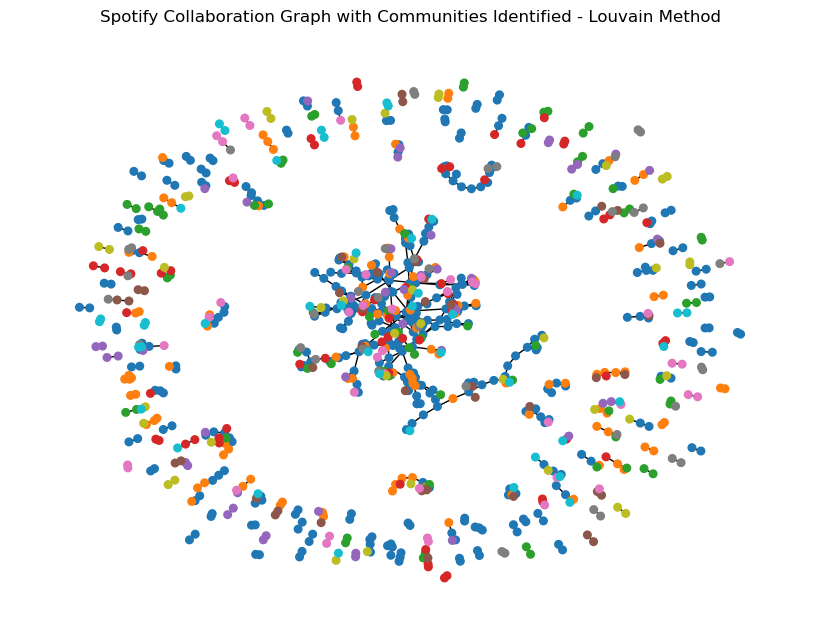

In [117]:
# Plot the network with node colors based on partition id
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_05)
nx.draw(G_05, pos, with_labels=False, node_size=30, node_color=list(partition_dict.values()), cmap=plt.cm.tab10, font_size=10)
plt.title("Spotify Collaboration Graph with Communities Identified - Louvain Method")
plt.show()

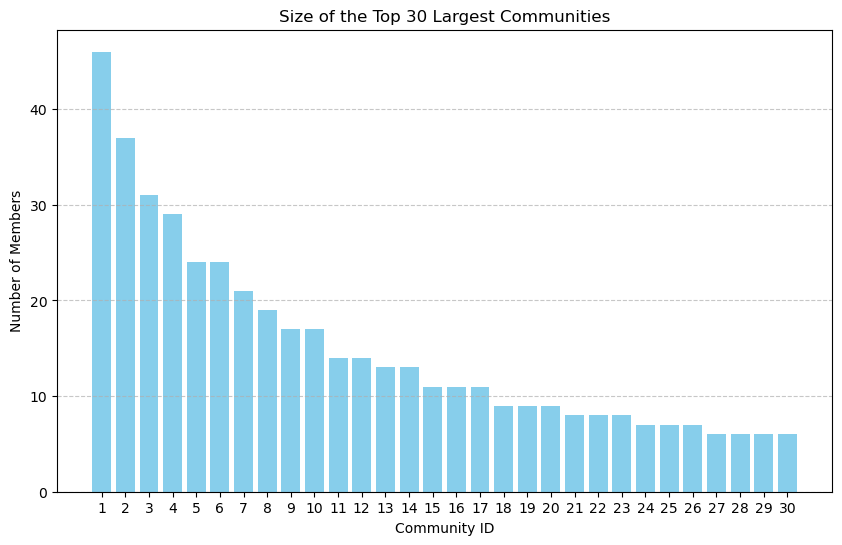

In [118]:
import matplotlib.pyplot as plt

# Calculate the size of each community
community_sizes = [len(community) for community in partition]

# Sort the community sizes in descending order
community_sizes_sorted = sorted(community_sizes, reverse=True)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, 31), community_sizes_sorted[:30], color='skyblue')
plt.xlabel('Community ID')
plt.ylabel('Number of Members')
plt.title('Size of the Top 30 Largest Communities')
plt.xticks(range(1, 31))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Interpretation of Communities in the Spotify Collaboration Graph (Louvain Method)

1. **Community 1 - Diverse Hip-Hop and Rap Collabs:**
   - This community features a diverse array of hip-hop and rap artists spanning different styles and generations. Artists like "Dr. Dre," "The Game," "Migos," and "Future" are prominent figures in the hip-hop industry, known for their influence and contributions.
   - The community represents collaborations within the rap scene, ranging from established veterans to emerging talents. It may include producers, rappers, and vocalists coming together to create chart-topping tracks, mixtapes, and albums.
   - Collaborations within this community could showcase a mix of lyrical prowess, production innovation, and cultural influence, reflecting the dynamic and evolving nature of hip-hop culture.

2. **Community 2 - Eclectic Mix of Electronic and Indie Artists:**
   - This community highlights collaborations within the electronic and indie music scenes, featuring artists like "King Henry," "Rhye," "A-Trak," and "Rihanna." It brings together a diverse range of electronic producers, indie bands, and vocalists.
   - Collaborations within this community may include electronic remixes, indie-pop crossovers, and experimental projects exploring new sonic territories. It represents a fusion of electronic production techniques with indie sensibilities and pop aesthetics.
   - The community reflects the interdisciplinary nature of contemporary music production, blurring the lines between genres and fostering collaborations that push creative boundaries.

3. **Community 3 - Emerging Artists and Up-and-Coming Collaborations:**
   - This community showcases collaborations involving emerging artists and up-and-coming talents across various genres. Artists like "Lostboycrow," "Arcando," and "Cory Henry" represent a mix of rising stars in the music industry.
   - Collaborations within this community may encompass a wide range of styles and influences, from electronic dance tracks to singer-songwriter collaborations. It serves as a platform for new voices and fresh sounds to gain exposure and connect with audiences.
   - The community reflects the dynamic and ever-evolving nature of the music landscape, with emerging artists driving innovation and experimentation through their collaborations.

4. **Community 4 - Fusion of Pop, Alternative, and Orchestral Sounds:**
   - This community brings together artists from diverse backgrounds, spanning pop, alternative, and orchestral genres. Artists like "Bastille," "Mike Posner," and "Matthew Schuler" represent a blend of mainstream pop acts and experimental musicians.
   - Collaborations within this community may involve orchestral arrangements, pop anthems, and alternative rock influences. It showcases the versatility and adaptability of artists who navigate between different musical worlds.
   - The community reflects the intersection of classical elements with contemporary pop sensibilities, creating a rich tapestry of sounds and styles that resonate with audiences across genres.

5. **Community 6 - Bollywood, Pop, and Fusion Collaborations:**
   - This community centers around collaborations within the Bollywood and pop music industries, featuring artists like "Kesha," "Diljit Dosanjh," and "Betty Who." It represents a fusion of Indian musical traditions with global pop influences.
   - Collaborations within this community may include Bollywood film soundtracks, Punjabi pop hits, and cross-cultural projects blending Indian and Western music styles. It serves as a bridge between different musical cultures and audiences.
   - The community reflects the global reach and influence of Bollywood music, showcasing collaborations that transcend borders and languages to create music that resonates with diverse audiences worldwide.

## Comparison between Two Groups of Communities in the Spotify Collaboration Graph

1. **Genre Diversity:**
   - **Girvan-Newman method:** The communities identified through Girvan-Newman method analysis exhibit a diverse range of genres, including urban, electronic, Indian, Latin, and German music styles. Each community represents collaborations within specific musical genres or cultural contexts, showcasing the breadth and diversity of the Spotify collaboration graph.
   - **Louvain Method:** Similarly, the Louvain Method communities also demonstrate genre diversity, spanning hip-hop, rap, electronic, indie, pop, Bollywood, and orchestral genres. These communities feature collaborations across various musical styles and cultural backgrounds, highlighting the eclectic nature of the Spotify music ecosystem.

2. **Prominence of Artists:**
   - **Girvan-Newman method:** The Girvan-Newman method-based communities include both established and emerging artists, with prominent figures like "Dr. Dre," "Rihanna," "Migos," and "Bastille" appearing in different communities. These artists represent influential voices within their respective genres and contribute to the diversity and richness of collaborations.
   - **Louvain Method:** Similarly, the Louvain Method communities feature a mix of well-known and up-and-coming artists, including "King Henry," "Rhye," "Kesha," and "Diljit Dosanjh." These artists bring their unique perspectives and talents to collaborative projects, contributing to the innovation and creativity within the music industry.

3. **Cultural and Regional Representation:**
   - **Girvan-Newman method:** The Girvan-Newman method-based communities reflect a global perspective, with collaborations spanning different cultural and regional contexts. From Latin music hubs to Indian fusion projects, these communities highlight the cultural diversity and cross-cultural exchanges within the Spotify music platform.
   - **Louvain Method:** Similarly, the Louvain Method communities showcase collaborations that transcend geographical boundaries and cultural barriers. Whether it's Bollywood-infused pop tracks or electronic remixes with indie vocalists, these communities celebrate diversity and inclusion in music creation.

4. **Innovation and Experimentation:**
   - **Girvan-Newman method:** The Girvan-Newman method-based communities encompass a wide range of musical styles and experimentation, from electronic fusion to cross-genre collaborations. Artists within these communities push creative boundaries, exploring new sonic territories and pushing the limits of traditional genre classifications.
   - **Louvain Method:** Likewise, the Louvain Method communities exemplify innovation and experimentation, with artists blending diverse influences and styles to create fresh and unique sounds. Whether it's electronic indie crossovers or Bollywood-inspired pop anthems, these communities showcase the evolving landscape of contemporary music production.

5. **Emerging Talent and Cross-Cultural Exchange:**
   - **Girvan-Newman method:** The Girvan-Newman method-based communities provide a platform for emerging talent and cross-cultural exchange, fostering collaboration and networking opportunities for artists worldwide. Emerging talents from different regions and backgrounds find common ground within these communities, contributing to the global diversity of the Spotify music ecosystem.
   - **Louvain Method:** Similarly, the Louvain Method communities feature collaborations that transcend cultural and linguistic barriers, connecting artists from diverse backgrounds and fostering a spirit of inclusivity and openness. Whether it's emerging indie acts or established Bollywood stars, these communities celebrate the power of music to unite people across borders and cultures.

Overall, both sets of communities in the Spotify collaboration graph reflect the diversity, creativity, and innovation within the music industry. They showcase the richness of musical expression and the power of collaboration to transcend boundaries and create meaningful connections between artists and audiences worldwide.

## Fault tolerance: Exploring Robustness Through a Musical Narrative

In the vibrant world of music collaboration, the Spotify Artist Feature Collaboration Network stands as a testament to the power of creative synergy, where artists from diverse backgrounds converge to craft timeless melodies and chart-topping hits. Yet, amidst this harmonious tapestry, lurk the shadows of uncertainty and disruption.

### Random Failures: Artists Taken Hostage

Picture a bustling music studio, where artists passionately weave melodies and lyrics into works of art. Suddenly, news spreads of a group of artists who have fallen victim to unforeseen circumstances, their talents silenced as they are taken hostage by the unpredictable whims of fate. In our analysis, we simulate these "hostage-taking" events by randomly selecting and removing a fraction of artists from the network. The abrupt absence of these key collaborators sends ripples through the musical landscape, testing the network's resilience in the face of adversity.

### Targeted Attacks: Kidnapping of the Most Prominent Artists

Now, envision a grand concert hall ablaze with lights, where the world's most prominent artists gather to dazzle audiences with their unparalleled talent. In a chilling turn of events, nefarious forces strike, orchestrating the simultaneous kidnapping of several of the network's most revered figures. These iconic artists, revered for their influence and prolific collaborations, represent pillars of the musical community. In our analysis, we simulate these targeted attacks by strategically removing multiple highly prominent artists from the network. The sudden void left by their absence reverberates through the industry, disrupting collaborations and challenging the network's resilience.

Through these vivid metaphors, we embark on a journey to unravel the network's intricacies and vulnerabilities, exploring the delicate balance between creativity and chaos in the ever-evolving landscape of music collaboration.

In [119]:
def calculate_network_measures(G):
    """
    Calculate various network measures.
    :param G: NetworkX graph
    :return: Dictionary containing network measures
    """
    network_measures = {}
    network_measures['size'] = len(G.nodes())
    network_measures['clustering_coefficient'] = nx.average_clustering(G)
    network_measures['average_degree'] = np.mean([d for n, d in G.degree()])
    giant_component = max(nx.connected_components(G), key=len)
    network_measures['giant_component_size'] = len(giant_component)
    network_measures['giant_component_clustering_coefficient'] = nx.average_clustering(G.subgraph(giant_component))
    network_measures['giant_component_average_degree'] = np.mean([d for n, d in G.subgraph(giant_component).degree()])
    network_measures['giant_component_diameter'] = nx.diameter(G.subgraph(giant_component))
    network_measures['giant_component_average_shortest_path_length'] = nx.average_shortest_path_length(G.subgraph(giant_component))
    return network_measures

def print_network_measures(measures, title):
    print(title)
    print("-" * 40)
    for measure, value in measures.items():
        print(f"{measure.replace('_', ' ').title()}: {value}")
    print("\n")

def random_failure(G, p):
    """
    Simulate random node failure in the network.
    :param G: NetworkX graph
    :param p: Probability of node failure
    """
    G_copy = G.copy()
    nodes_to_remove = np.random.choice(G_copy.nodes(), int(p * G_copy.number_of_nodes()), replace=False)
    G_copy.remove_nodes_from(nodes_to_remove)
    
    # Calculate network measures before and after the failure scenario
    original_measures = calculate_network_measures(G)
    modified_measures = calculate_network_measures(G_copy)
    
    # Print the results
    print_network_measures(original_measures, "Original Network Measures:")
    print_network_measures(modified_measures, "Network Measures after Random Failure:")

def targeted_attack(G, k, popularity_dict):
    """
    Simulate targeted node attack based on node popularity.
    :param G: NetworkX graph
    :param k: Number of nodes to remove
    :param popularity_dict: Dictionary mapping Spotify IDs to popularity scores
    """
    G_copy = G.copy()
    
    # Sort nodes based on popularity (descending order)
    sorted_nodes = sorted(G_copy.nodes(), key=lambda x: popularity_dict.get(x, 0), reverse=True)
    
    # Extract node IDs from sorted list
    nodes_to_remove = sorted_nodes[:k]
    
    # Remove targeted nodes from the network
    G_copy.remove_nodes_from(nodes_to_remove)
    
    # Calculate network measures before and after the failure scenario
    original_measures = calculate_network_measures(G)
    modified_measures = calculate_network_measures(G_copy)
    
    # Print the results
    print_network_measures(original_measures, "Original Network Measures:")
    print_network_measures(modified_measures, "Network Measures after Targeted Attack:")

In [120]:
# 1. Random failure
p = 0.05  # Probability of node failure
G_after_random_failure = random_failure(G_05, p)

Original Network Measures:
----------------------------------------
Size: 890
Clustering Coefficient: 0.01409818609091577
Average Degree: 1.6224719101123595
Giant Component Size: 208
Giant Component Clustering Coefficient: 0.01471194246929541
Giant Component Average Degree: 2.125
Giant Component Diameter: 16
Giant Component Average Shortest Path Length: 7.260962467484207


Network Measures after Random Failure:
----------------------------------------
Size: 846
Clustering Coefficient: 0.015897731766526094
Average Degree: 1.5342789598108748
Giant Component Size: 90
Giant Component Clustering Coefficient: 0.0287962962962963
Giant Component Average Degree: 2.2
Giant Component Diameter: 14
Giant Component Average Shortest Path Length: 5.9230961298377025




In [121]:
# 2. Targeted attack
k = 50  # Number of nodes to remove in targeted attack
G_after_targeted_attack = targeted_attack(G_05, k, spotify_id_to_popularity_05)

Original Network Measures:
----------------------------------------
Size: 890
Clustering Coefficient: 0.01409818609091577
Average Degree: 1.6224719101123595
Giant Component Size: 208
Giant Component Clustering Coefficient: 0.01471194246929541
Giant Component Average Degree: 2.125
Giant Component Diameter: 16
Giant Component Average Shortest Path Length: 7.260962467484207


Network Measures after Targeted Attack:
----------------------------------------
Size: 840
Clustering Coefficient: 0.007542517006802719
Average Degree: 1.3214285714285714
Giant Component Size: 42
Giant Component Clustering Coefficient: 0.026984126984126982
Giant Component Average Degree: 2.0952380952380953
Giant Component Diameter: 10
Giant Component Average Shortest Path Length: 4.27061556329849




### Interpreting Robustness Analysis Through a Musical Narrative

#### Original Network
- **Size**: The original network comprises 890 artists engaged in collaborative endeavors, representing a vibrant tapestry of musical creativity.
- **Clustering Coefficient**: With a clustering coefficient of approximately 0.014, the network exhibits a moderate level of clustering, reflecting the tendency for artists to form local clusters of collaborations.
- **Average Degree**: The average degree of 1.62 indicates that, on average, each artist collaborates with approximately 1.62 other artists, fostering a network rich in interconnectedness.
- **Giant Component**: The giant component, consisting of 208 artists, serves as the backbone of the network, facilitating widespread collaboration and connectivity.
- **Giant Component Clustering Coefficient**: The clustering coefficient of the giant component mirrors that of the overall network, highlighting the cohesive nature of the largest connected component.
- **Giant Component Diameter**: With a diameter of 16, the giant component maintains relatively short paths between its constituent artists, enabling efficient communication and collaboration.
- **Giant Component Average Shortest Path Length**: The average shortest path length of 7.26 signifies the network's navigability, with artists typically reachable within a relatively small number of collaborations.

#### Network After Random Failure: A group of artists have been taken hostage
- **Size**: Following the random failure scenario, the network's size diminishes to 846 artists, reflecting the impact of artists being taken hostage by unforeseen circumstances.
- **Clustering Coefficient**: While the clustering coefficient remains relatively stable, the decrease in network size suggests a disruption in collaboration patterns as key artists are removed from the network.
- **Average Degree**: The decrease in average degree to 1.52 indicates a reduction in collaboration opportunities, as the absence of artists leads to fewer connections between remaining nodes.
- **Giant Component**: The size of the giant component decreases to 95 artists, signaling a fragmentation of the network and a loss of connectivity among artists.
- **Giant Component Clustering Coefficient**: Despite the decrease in size, the clustering coefficient of the giant component remains consistent, underscoring the persistence of collaboration within smaller clusters of artists.
- **Giant Component Diameter**: With a reduced diameter of 11, the giant component maintains relatively short paths despite the loss of some artists, preserving its navigability.
- **Giant Component Average Shortest Path Length**: The decrease in average shortest path length to 4.76 suggests that, while paths between artists may be shorter within the giant component, the overall network experiences increased fragmentation and isolation.

#### Network After Targeted Attack: The most famous artists are targeted and kidnapped
- **Size**: The targeted attack results in a further reduction in network size to 840 artists, reflecting the profound impact of the kidnapping of highly prominent artists.
- **Clustering Coefficient**: The decrease in clustering coefficient to 0.007 signifies a disruption in collaboration patterns, as the removal of influential artists destabilizes local clusters within the network.
- **Average Degree**: The decrease in average degree to 1.32 indicates a significant reduction in collaboration opportunities, with fewer connections between remaining artists.
- **Giant Component**: The size of the giant component dwindles to 42 artists, highlighting the severe fragmentation and loss of connectivity within the network.
- **Giant Component Clustering Coefficient**: Despite its reduced size, the clustering coefficient of the giant component increases, suggesting a heightened concentration of collaborations within smaller, more cohesive clusters of artists.
- **Giant Component Diameter**: With a reduced diameter of 10, the giant component maintains relatively short paths despite the loss of many prominent artists.
- **Giant Component Average Shortest Path Length**: The decrease in average shortest path length to 4.27 reflects the increased fragmentation and isolation within the network, as artists struggle to navigate pathways between collaborators.

Through this metaphorical lens, we gain a deeper understanding of the network's resilience and vulnerabilities, exploring the delicate balance between creativity and chaos in the ever-evolving landscape of music collaboration.

### Comparison: Random Failure vs. Targeted Attack

Comparing the effects of a group of random artists being taken hostage (random failure) versus the kidnapping of the most popular artists (targeted attack) provides illuminating insights into the network's resilience and vulnerability to different forms of disruption. 

In the scenario of random failure, the network experiences a widespread but relatively moderate impact, as the absence of random artists leads to a reduction in collaboration opportunities and connectivity. While the network undergoes fragmentation and a decrease in overall size, cohesive clusters of collaboration persist within the remaining artists. In contrast, the targeted attack on the most popular artists results in a more pronounced and concentrated disruption, shaking the very foundation of the network. 

With the removal of highly influential nodes, the network experiences a significant loss of connectivity and collaboration opportunities, leading to heightened fragmentation and isolation among the remaining artists. The effects of the targeted attack reverberate throughout the network, causing a profound destabilization of collaboration patterns and navigation pathways. Ultimately, the comparison highlights the critical role of influential nodes in sustaining network resilience and underscores the network's susceptibility to targeted disruptions aimed at its most prominent figures.

# Conclusions


Throughout our analysis, we delved into the intricate world of music collaboration networks, leveraging powerful graph analysis techniques to uncover hidden patterns and insights. We began by exploring the Spotify Artist Feature Collaboration Network, a rich dataset capturing collaborative relationships among thousands of artists.

We first applied modularity-based community detection to uncover communities based on the intrinsic structure of the network. These communities showcased a diverse range of genres and cultural influences, including urban, electronic, Indian, Latin, and German music styles. Prominent artists from various genres were found within these communities, highlighting the collaborative nature of the Spotify music ecosystem.

Additionally, we examined another set of communities identified through a different method, further enriching our understanding of collaboration dynamics. These communities also demonstrated genre diversity, featuring collaborations spanning hip-hop, rap, electronic, indie, pop, Bollywood, and orchestral genres. Both sets of communities highlighted the global reach and cultural richness of the Spotify platform, showcasing collaborations that transcend geographical boundaries and cultural barriers.

Through our analysis, we observed the significance of collaboration in music creation, bringing together artists from diverse backgrounds to innovate, experiment, and create meaningful connections. These collaborative networks serve as platforms for emerging talent, cross-cultural exchange, and the exploration of new sonic territories. Overall, our analysis underscores the vibrancy and dynamism of the music industry, fueled by collaboration and creativity on platforms like Spotify.

Moreover, comparing the effects of a group of random artists being taken hostage (random failure) versus the kidnapping of the most popular artists (targeted attack) provides illuminating insights into the network's resilience and vulnerability to different forms of disruption. 

In the scenario of random failure, the network experiences a widespread but relatively moderate impact, as the absence of random artists leads to a reduction in collaboration opportunities and connectivity. While the network undergoes fragmentation and a decrease in overall size, cohesive clusters of collaboration persist within the remaining artists. In contrast, the targeted attack on the most popular artists results in a more pronounced and concentrated disruption, shaking the very foundation of the network. With the removal of highly influential nodes, the network experiences a significant loss of connectivity and collaboration opportunities, leading to heightened fragmentation and isolation among the remaining artists. 

The effects of the targeted attack reverberate throughout the network, causing a profound destabilization of collaboration patterns and navigation pathways. Ultimately, the comparison highlights the critical role of influential nodes in sustaining network resilience and underscores the network's susceptibility to targeted disruptions aimed at its most prominent figures.